# Summarising the Relationship Between Two Variables

## Associations: Quantitative and Catetgorical Variables

Examining the relationship between variables can give us key insight into our data. In this lesson, we will cover ways of assessing the association between a quantitative variable and a categorical variable.

In the next few exercises, we’ll explore a dataset that contains the following information about students at two portuguese schools:

In [2]:
import numpy as np
import pandas as pd

In [3]:
students = pd.read_csv('students_portugal.csv')

In [4]:
#print the first five rows of students:
display(students.head())

#separate out scores for students who live in urban and rural locations:
scores_urban = students.G3[students.address == 'U']
scores_rural = students.G3[students.address == 'R']

,school,address,absences,Mjob,Fjob,G3
0,GP,U,6,at_home,teacher,6
1,GP,U,4,at_home,other,6
2,GP,U,10,at_home,other,10
3,GP,U,2,health,services,15
4,GP,U,4,other,other,10


### Mean and Median Differences

Recall that in the last exercise, we began investigating whether or not there is an association between math scores and the school a student attends. We can begin quantifying this association by using two common summary statistics, mean and median differences. To calculate the difference in mean G3 scores for the two schools, we can start by finding the mean math score for students at each school. We can then find the difference between them:

In [5]:
scores_urban = students.G3[students.address == 'U']
scores_rural = students.G3[students.address == 'R']

#calculate means for each group:
scores_urban_mean = np.mean(scores_urban)
scores_rural_mean = np.mean(scores_rural)

#print mean scores:
print('Mean score - students w/ urban address:')
print(scores_urban_mean)
print('Mean score - students w/ rural address:')
print(scores_rural_mean)

#calculate mean difference:
mean_diff = scores_urban_mean - scores_rural_mean

#print mean difference
print('Mean difference:')
print(mean_diff)

#calculate medians for each group:
scores_urban_median = np.median(scores_urban)
scores_rural_median = np.median(scores_rural)

#print median scores
print('Median score - students w/ urban address:')
print(scores_urban_median)
print('Median score - students w/ rural address:')
print(scores_rural_median)

#calculate median difference
median_diff = scores_urban_median - scores_rural_median

#print median difference
print('Median difference:')
print(median_diff)

Mean score - students w/ urban address:
10.674267100977199
Mean score - students w/ rural address:
9.511363636363637
Mean difference:
1.1629034646135619
Median score - students w/ urban address:
11.0
Median score - students w/ rural address:
10.0
Median difference:
1.0


### Side-by-Side Box Plots

The difference in mean math scores for students at GP and MS was 0.64. How do we know whether this difference is considered small or large? To answer this question, we need to know something about the spread of the data.

One way to get a better sense of spread is by looking at a visual representation of the data. Side-by-side box plots are useful in visualizing mean and median differences because they allow us to visually estimate the variation in the data. This can help us determine if mean or median differences are “large” or “small”.

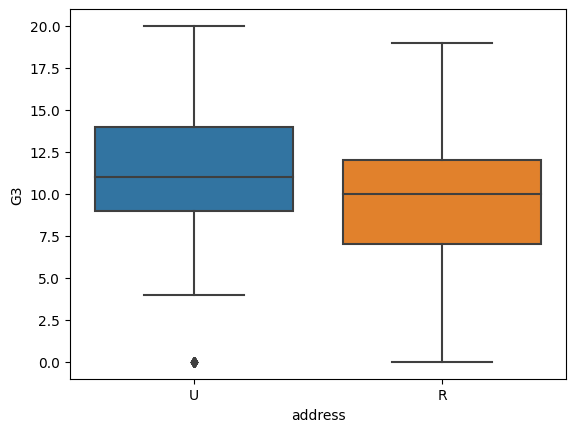

In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns

#create the boxplot here:
sns.boxplot(data=students, x='address', y='G3')

plt.show()

### Inspecting Overlapping Histograms

Another way to explore the relationship between a quantitative and categorical variable in more detail is by inspecting overlapping histograms. In the code below, setting `alpha = .5` ensures that the histograms are see-through enough that we can see both of them at once. We have also used `normed=True` make sure that the y-axis is a density rather than a frequency (note: the newest version of matplotlib renamed this parameter `density` instead of `normed`):

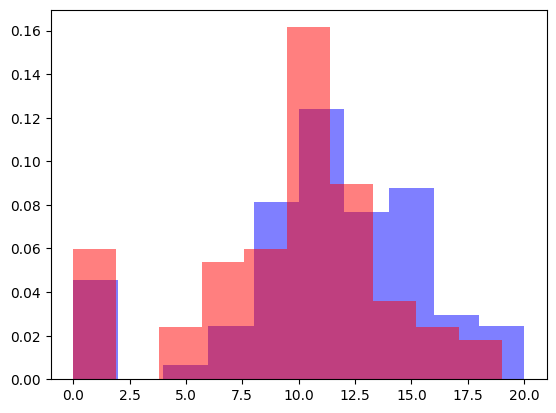

In [7]:
plt.hist(scores_urban , color="blue", label="Urban", density=True, alpha=0.5)
plt.hist(scores_rural , color="red", label="Rural", density=True, alpha=0.5)

plt.show()

### Exploring Non-Binary Categorical Variables

In each of the previous exercises, we assessed whether there was an association between a quantitative variable (math scores) and a BINARY categorical variable (school). The categorical variable is considered binary because there are only two available options, either MS or GP. However, sometimes we are interested in an association between a quantitative variable and non-binary categorical variable. Non-binary categorical variables have more than two categories.

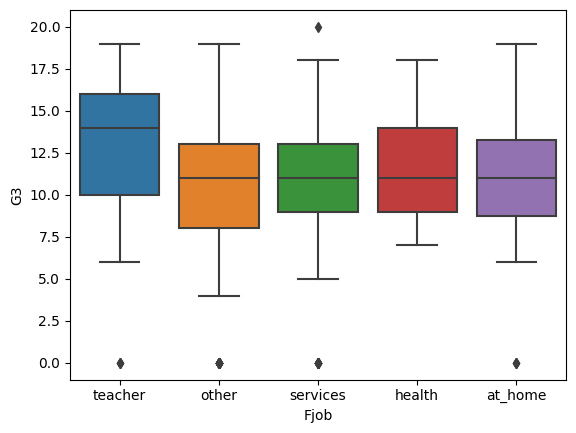

In [8]:
sns.boxplot(data = students, x = 'Fjob', y = 'G3')

plt.show()

### Review

A new dataset named titanic has been uploaded for you in script.py. This data contains information about passengers on the Titanic, including the amount they paid for their fare and whether or not they survived (note: this is a subset of the full data available). To practice the skills learned in this lesson, let’s investigate whether there is an association between the fare that a passenger paid (Fare) and whether or not they survived (Survived, which is equal to 0 if the passenger died and 1 if they survived):

 - Calculate the difference in mean fare paid by those who survived and those who died. Which group paid a higher average fare?
 - Calculate the difference in median fare for those who survived and those who died.
 - Create side-by-side box plots of fares by survival. Now that you can see the spread of the data, do the mean/median differences seem relatively small or large?
 - Create overlapping histograms of fares by survival (you’ll have to delete or comment out your box plot code before you try to make a histogram). Does this provide any additional information?

In [9]:
titanic = pd.read_csv('titanic.csv')
display(titanic.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
Survived = titanic.Fare[titanic.Survived == 1]
Dies = titanic.Fare[titanic.Survived == 0]

Mean difference:  18.082197554799443
Median difference:  15.5375


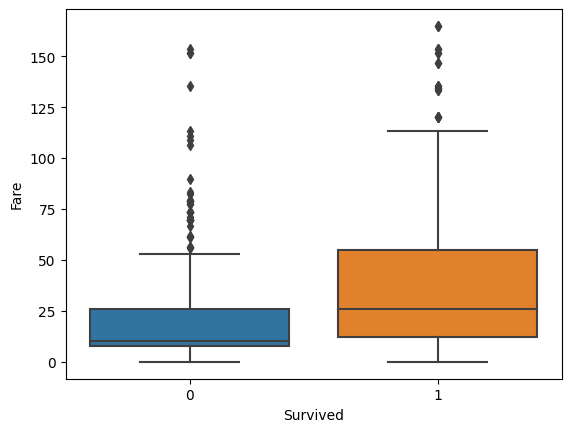

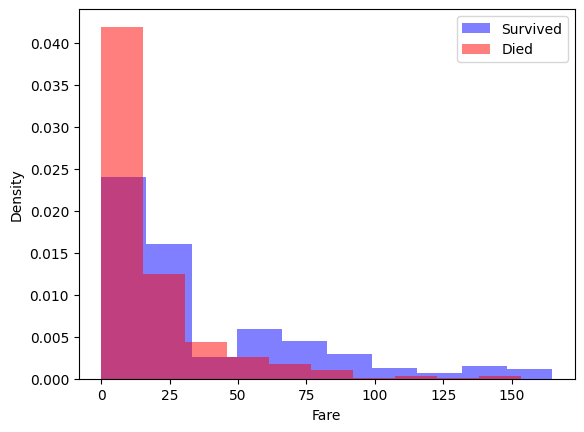

In [19]:
# Calculate the difference in mean fare paid by those who survived and those who died. Which group paid a higher average fare?
survive_mean = np.mean(Survived)
died_mean = np.mean(Dies)
diff_mean = survive_mean - died_mean
print("Mean difference: ", diff_mean)

survive_med = np.median(Survived)
died_med = np.median(Dies)
diff_med = survive_med - died_med
print("Median difference: ", diff_med)

# create side by side plots of fare paid by survivors and nonsurvivors
sns.boxplot(data = titanic, x = 'Survived', y = 'Fare')
plt.show()

# create histograms of fare paid by survivors and nonsurvivors
plt.hist(Survived, color="blue", label="Survived", density=True, alpha=0.5)
plt.hist(Dies, color="red", label="Died", density=True, alpha=0.5)
plt.legend(loc='upper right')
#add axis labels
plt.xlabel('Fare')
plt.ylabel('Density')
plt.show()